# Decision Tree: Wine Dataset

## Loading Packages

In [1]:
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

## Loading Wine Dataset

In [2]:
df = pd.read_csv('wine.csv')                     # load dataset into a dataframe
wine_df = df.drop(columns=['Wine Variety'])      # get features minus the label
y = df['Wine Variety']                           # get label column only

In [3]:
wine_classes = ["1", "2", "3"]                   # label values of Wine Variety

wine_features = wine_df.columns.tolist()
wine_features

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total Phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'Wine Dilution',
 'Proline']

## Data Preparation

We split the data into two: train and test set.

In [4]:
# split training (60%) and test (40%) dataset

wine_train_df = wine_df.sample(frac=0.6, random_state=0)         
wine_train_y = y[wine_train_df.index]      

wine_test_df = wine_df.drop(wine_train_df.index) 
wine_test_y = y[wine_test_df.index]       

## Train and Test Full Tree

In [5]:
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(wine_train_df, wine_train_y)

pred_labels = dt_clf.predict(wine_test_df)
acc = dt_clf.score(wine_test_df, wine_test_y)
cm = confusion_matrix(wine_test_y, pred_labels)

print(acc)
print(cm)

0.9295774647887324
[[25  0  0]
 [ 2 22  1]
 [ 0  2 19]]


### Induce Full Tree

In [6]:
tree_text = export_text(dt_clf, feature_names=wine_features)
print(tree_text)

|--- Color intensity <= 3.46
|   |--- class: 2
|--- Color intensity >  3.46
|   |--- Flavanoids <= 1.38
|   |   |--- class: 3
|   |--- Flavanoids >  1.38
|   |   |--- Proline <= 670.00
|   |   |   |--- class: 2
|   |   |--- Proline >  670.00
|   |   |   |--- class: 1



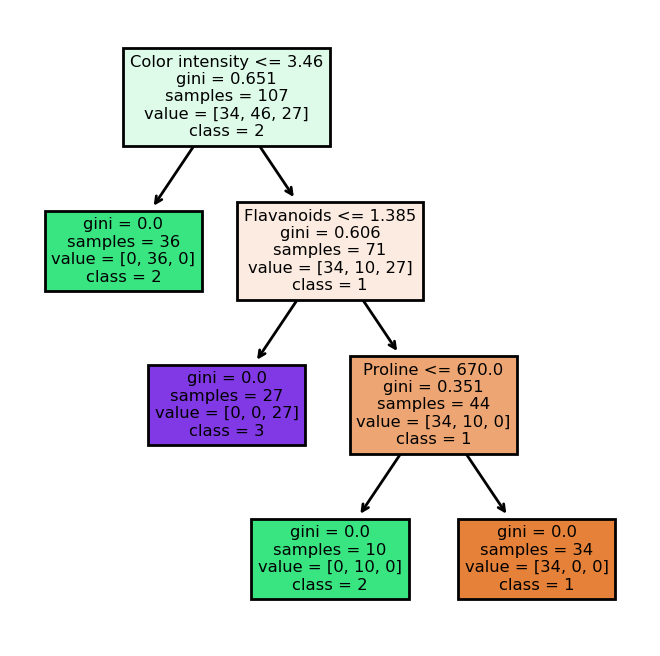

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=200)
plot_tree(dt_clf, filled=True, feature_names=wine_features, class_names=wine_classes, ax=axes)
plt.show()

### Trimmed

In [8]:
testA = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium']
testB = ['Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',]
testC = ['Color intensity', 'Hue', 'Wine Dilution', 'Proline']

feature_sets = [testA, testB, testC]

best_acc = 0
best_model = None
best_cm = 0
best_set = []

for f_set in feature_sets:
    wine_temp_df = wine_df[f_set]
    # split training (60%) and test (40%) dataset

    wine_train_df = wine_temp_df.sample(frac=0.6, random_state=0)         
    wine_train_y = y[wine_train_df.index]      

    wine_test_df = wine_temp_df.drop(wine_train_df.index) 
    wine_test_y = y[wine_test_df.index]  
    
    dt_clf = tree.DecisionTreeClassifier()
    dt_clf = dt_clf.fit(wine_train_df, wine_train_y)

    pred_labels = dt_clf.predict(wine_test_df)
    acc = dt_clf.score(wine_test_df, wine_test_y)
    cm = confusion_matrix(wine_test_y, pred_labels)

    print(f_set)
    print(acc)
    
    if acc > best_acc:
        best_acc = acc
        best_model = dt_clf
        best_cm = cm
        best_set = f_set


['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium']
0.8028169014084507
['Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins']
0.7605633802816901
['Color intensity', 'Hue', 'Wine Dilution', 'Proline']
0.971830985915493


In [9]:
print(best_set)
print(best_acc)
print(cm)

['Color intensity', 'Hue', 'Wine Dilution', 'Proline']
0.971830985915493
[[25  0  0]
 [ 1 24  0]
 [ 0  1 20]]


In [10]:
tree_text = export_text(best_model, feature_names=best_set)
print(tree_text)

|--- Color intensity <= 3.46
|   |--- class: 2
|--- Color intensity >  3.46
|   |--- Wine Dilution <= 2.48
|   |   |--- Hue <= 0.97
|   |   |   |--- Color intensity <= 4.85
|   |   |   |   |--- Color intensity <= 4.40
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Color intensity >  4.40
|   |   |   |   |   |--- class: 2
|   |   |   |--- Color intensity >  4.85
|   |   |   |   |--- class: 3
|   |   |--- Hue >  0.97
|   |   |   |--- class: 2
|   |--- Wine Dilution >  2.48
|   |   |--- Proline <= 670.00
|   |   |   |--- class: 2
|   |   |--- Proline >  670.00
|   |   |   |--- class: 1



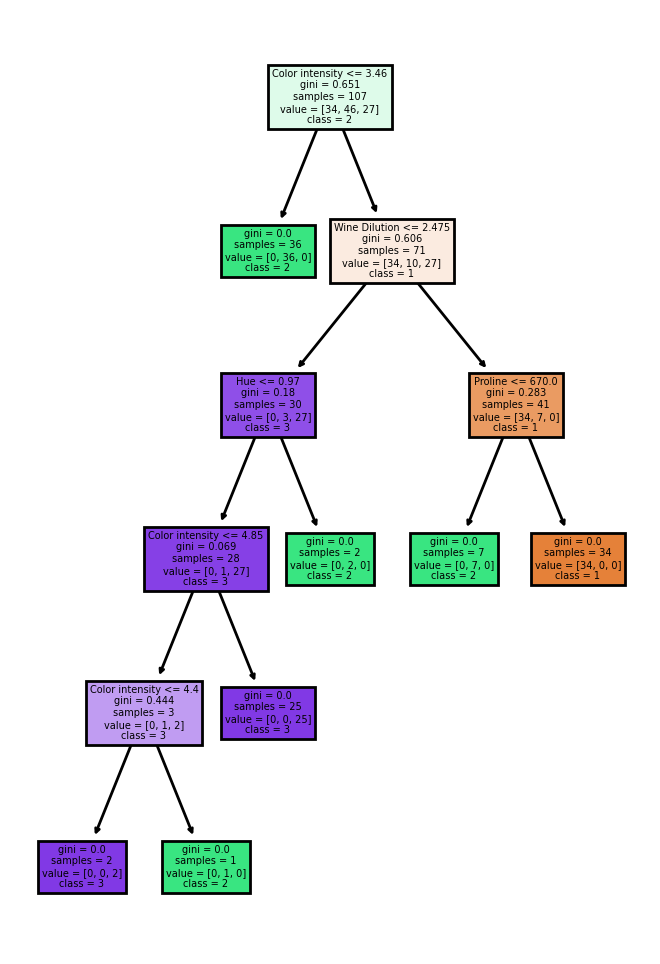

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(best_model, filled=True, feature_names=best_set, class_names=wine_classes, ax=axes)
plt.show()